## KNN Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
Binary Classification yielded a maximum accuracy of 77.53%. Severity Classification (multiple classes) was around 56%.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [27]:
# df = pd.read_csv("full_dataset_v1.csv")
# df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_v1.csv")
df = pd.read_csv("dataset.csv")
len(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17808

In [28]:
df['severity'].value_counts()

medium          5594
small           2612
unknown          834
large            679
...              359
very_large       102
Medium            72
Unknown           19
Large             17
Small             10
catastrophic       4
landslide          2
Very...large       1
Very_large         1
Name: severity, dtype: int64

In [29]:
# filter by severity. na is for non-landslide data
# df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
# Remove -1 slopes
# df = df.loc[~(df.slope == -1)]
print(len(df))
print(df.forest.value_counts())

17808
1.0    9946
0.0     360
Name: forest, dtype: int64


In [30]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))
df

17808


,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,11250,18480,2/8/15,24.714500,115.960100,NaN,NaN,NaN,NaN,NaN,...,0.038360,0.014184,0.205219,0.054093,0.025236,0.013752,0.074084,0.022049,22.730,5023
1,1363,3221,12/19/15,46.185700,-123.751800,United_States,0.0,0.0,landslide,unknown,...,8.834411,4.298478,2.752935,1.601770,2.301061,5.864545,2.685515,2.573296,22.523,488
2,17842,16122,6/3/11,-8.719000,21.320600,NaN,NaN,NaN,NaN,NaN,...,0.021847,0.478045,0.191840,0.069334,0.036289,0.022655,0.015508,0.011287,5.545,650
3,15226,16812,9/5/09,55.662300,106.053500,NaN,NaN,NaN,NaN,NaN,...,0.044125,1.419224,0.561907,0.336244,2.390918,5.209014,1.710290,0.752983,9.166,2300
4,14288,16075,3/25/13,34.375900,125.399600,NaN,NaN,NaN,NaN,NaN,...,11.331253,2.953379,1.415258,0.760188,0.680941,0.383998,0.250079,0.016077,0.000,4794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,767,12335,12/13/08,-38.158300,144.350000,Australia,0.0,0.0,mudslide,rain,...,0.086836,0.111805,0.043305,2.535227,0.640737,0.285981,1.944889,12.520888,1.106,28292
17804,4208,2393,12/9/15,46.041100,-123.248100,United_States,0.0,0.0,landslide,unknown,...,1.668360,1.281587,0.800886,0.301793,0.166688,0.898893,0.470388,1.290868,16.126,14269
17805,11506,17880,2/3/17,-13.659200,48.273000,NaN,NaN,NaN,NaN,NaN,...,4.621225,3.655879,6.247937,5.646880,5.450718,4.569618,4.228041,8.517383,0.000,1326
17806,5077,4273,5/16/18,0.990683,34.332391,Uganda,0.0,0.0,rotational_slide,continuous_rain,...,7.195522,5.332775,3.392369,2.410055,3.066273,4.597893,4.404921,3.791148,24.902,9230


In [31]:
df = df.query("(landslide == 0) | (landslide == 1 & (severity == 'medium' | severity == 'small' | severity == 'large' | severity=='very_large'))")
df

,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,11250,18480,2/8/15,24.714500,115.960100,NaN,NaN,NaN,NaN,NaN,...,0.038360,0.014184,0.205219,0.054093,0.025236,0.013752,0.074084,0.022049,22.730,5023
2,17842,16122,6/3/11,-8.719000,21.320600,NaN,NaN,NaN,NaN,NaN,...,0.021847,0.478045,0.191840,0.069334,0.036289,0.022655,0.015508,0.011287,5.545,650
3,15226,16812,9/5/09,55.662300,106.053500,NaN,NaN,NaN,NaN,NaN,...,0.044125,1.419224,0.561907,0.336244,2.390918,5.209014,1.710290,0.752983,9.166,2300
4,14288,16075,3/25/13,34.375900,125.399600,NaN,NaN,NaN,NaN,NaN,...,11.331253,2.953379,1.415258,0.760188,0.680941,0.383998,0.250079,0.016077,0.000,4794
5,11532,14408,6/16/15,4.504300,41.722800,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.438,1275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,2533,13253,7/4/13,35.605700,-82.541200,United_States,0.0,0.0,landslide,downpour,...,0.194930,0.509346,0.173270,3.062015,1.583934,1.076918,2.931114,3.245233,4.981,13583
17803,767,12335,12/13/08,-38.158300,144.350000,Australia,0.0,0.0,mudslide,rain,...,0.086836,0.111805,0.043305,2.535227,0.640737,0.285981,1.944889,12.520888,1.106,28292
17805,11506,17880,2/3/17,-13.659200,48.273000,NaN,NaN,NaN,NaN,NaN,...,4.621225,3.655879,6.247937,5.646880,5.450718,4.569618,4.228041,8.517383,0.000,1326
17806,5077,4273,5/16/18,0.990683,34.332391,Uganda,0.0,0.0,rotational_slide,continuous_rain,...,7.195522,5.332775,3.392369,2.410055,3.066273,4.597893,4.404921,3.791148,24.902,9230


In [32]:
X = df.copy()
y = []
types = set()
for idx, row in X.iterrows():
    if row.landslide == 0:
        y.append(0)
    elif row.severity == 'small':
        y.append(1)
    elif row.severity == 'medium':
        y.append(2)
    else:
        y.append(3)
    types.add(y[-1])
print(types)
columns=[]
for i in range(9, 4, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
columns.append('slope')
columns.append('forest2')
columns.append('osm')
X = X[columns]
X

{0, 1, 2, 3}


,humidity9,ARI9,humidity8,ARI8,humidity7,ARI7,humidity6,ARI6,humidity5,ARI5,slope,forest2,osm
0,86,0.096932,87,0.102674,90,0.038360,77,0.014184,85,0.205219,22.730,1,5023
2,72,0.064768,68,0.034800,68,0.021847,74,0.478045,67,0.191840,5.545,1,650
3,82,0.127045,92,0.072722,88,0.044125,98,1.419224,98,0.561907,9.166,1,2300
4,61,0.305927,95,1.320283,98,11.331253,90,2.953379,91,1.415258,0.000,0,4794
5,59,0.005400,68,0.000000,64,0.000000,61,0.000000,69,0.000000,7.438,1,1275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,96,1.109790,96,0.473740,97,0.194930,97,0.509346,94,0.173270,4.981,1,13583
17803,91,0.252418,71,0.296389,86,0.086836,79,0.111805,93,0.043305,1.106,1,28292
17805,79,2.676040,77,2.926688,79,4.621225,80,3.655879,80,6.247937,0.000,1,1326
17806,91,3.584894,93,5.765714,93,7.195522,93,5.332775,91,3.392369,24.902,1,9230


## Scaling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
cnt1 = 0
cnt2 = 0
for i in y_train:
    if i == 1:
        cnt1 += 1
    else:
        cnt2 += 1
print(cnt1,cnt2)

2075 11116


## Prediction

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [36]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_train)
# class_probabilities = knn.predict_proba()
print("ACCURACY:", accuracy_score(pred, y_train))

ACCURACY: 0.6861496474869229


In [37]:
best = 1
highest = 0

for i in range(1, 130):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("k =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
# Binary: k = 87, 58.9
# 62.4 na/landslide
print("Best k:", best, highest)

k = 1   ACCURACY: 58.0
k = 2   ACCURACY: 59.37
k = 3   ACCURACY: 61.28
k = 4   ACCURACY: 62.37
k = 5   ACCURACY: 62.64
k = 6   ACCURACY: 63.37
k = 7   ACCURACY: 64.37
k = 8   ACCURACY: 64.95
k = 9   ACCURACY: 63.89
k = 10   ACCURACY: 64.65
k = 11   ACCURACY: 64.46
k = 12   ACCURACY: 65.1
k = 13   ACCURACY: 65.31
k = 14   ACCURACY: 64.77
k = 15   ACCURACY: 64.55
k = 16   ACCURACY: 64.28
k = 17   ACCURACY: 64.61
k = 18   ACCURACY: 65.01
k = 19   ACCURACY: 65.1
k = 20   ACCURACY: 65.25
k = 21   ACCURACY: 65.25
k = 22   ACCURACY: 65.1
k = 23   ACCURACY: 65.25
k = 24   ACCURACY: 65.31
k = 25   ACCURACY: 65.34
k = 26   ACCURACY: 65.13
k = 27   ACCURACY: 65.25
k = 28   ACCURACY: 64.92
k = 29   ACCURACY: 65.1
k = 30   ACCURACY: 65.22
k = 31   ACCURACY: 65.22
k = 32   ACCURACY: 65.43
k = 33   ACCURACY: 65.19
k = 34   ACCURACY: 65.71
k = 35   ACCURACY: 65.49
k = 36   ACCURACY: 65.52
k = 37   ACCURACY: 65.28
k = 38   ACCURACY: 65.49
k = 39   ACCURACY: 65.4
k = 40   ACCURACY: 65.22
k = 41   ACCURA

## Confusion Matrix

In [38]:
knn = KNeighborsClassifier(n_neighbors=best)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(pred, y_test))
print("Best k:", best, highest)

0.6570648878107944
Best k: 34 65.71


In [1]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

[[1214, 12, 226, 0], [143, 55, 339, 0], [232, 42, 898, 0], [35, 0, 102, 0]]

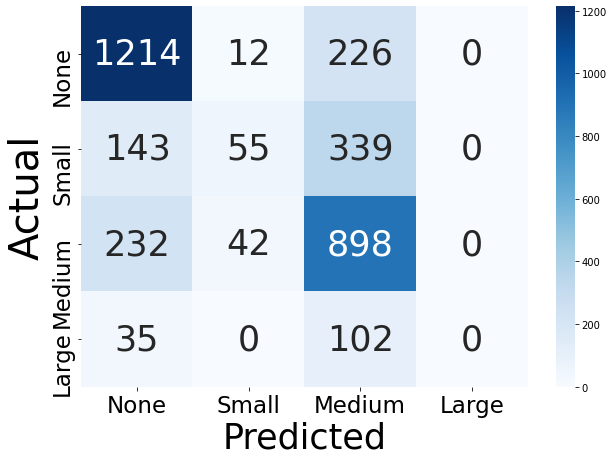

In [3]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = False
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size":35}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=23)
plt.xlabel('Predicted', fontsize = 35) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("KNN Multi Matrix", bbox_inches="tight")

plt.show()